[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ryansteed/image-gpt-bias/blob/master/notebooks/experiments.ipynb)

# Image GPT Bias
**Image Embedding Association Test**

Ryan Steed

This script adapted from https://colab.research.google.com/github/apeguero1/image-gpt/blob/master/Transformers_Image_GPT.ipynb.


In [4]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

%cd /Users/steed/caliskan/git/image-gpt-bias

/Users/steed/caliskan/git/image-gpt-bias


## Download Model

In [2]:
!nvidia-smi #OpenAI says you need 16GB GPU for the large model, but it may work if you lower n_sub_batch on the others.

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
import urllib

# don't share these to Github or elsewhere!
u = "your_username"
p = urllib.parse.quote("your_password")
!git clone --recurse-submodules -j8 https://$u:$p@github.com/$u/image-gpt-bias.git
%cd image-gpt-bias

fatal: destination path 'image-gpt-bias' already exists and is not an empty directory.
/content/image-gpt-bias


In [5]:
# note - you may need to restart the kernel for these installations to take effect
!pip install -e .
!pip install -e weat

Obtaining file:///content/image-gpt-bias
     |████████████████████████████████| 890kB 7.6MB/s 
     |████████████████████████████████| 890kB 28.9MB/s 
     |████████████████████████████████| 1.1MB 49.8MB/s 
     |████████████████████████████████| 3.0MB 49.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=0192b1d5778042b13d5ed2d957ee6583dade62ebde7ff12311456a4835bf6093
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
  Running setup.py develop for ieat
Obtaining file:///content/image-gpt-bias/weat
  Running setup.py develop for weat


In [5]:
model_sizes = ["s", "m", "l"] #small medium large, xl not available
model_size = "s"
models_dir = "models"
color_clusters_dir = "clusters"
n_px = 32

In [6]:
# download the model - skip if already downloaded
!python image-gpt/download.py --model {model_size} --ckpt 1000000 --clusters --download_dir {models_dir}/{model_size}
!python image-gpt/download.py --clusters --download_dir {color_clusters_dir}

input args:
 {
    "download_dir":"models/l",
    "model":"l",
    "ckpt":"1000000",
    "clusters":true,
    "dataset":null
}
Fetching model.ckpt-1000000.data-00000-of-00064: 1.00kit [00:00, 764kit/s]      
Fetching model.ckpt-1000000.data-00001-of-00064: 252Mit [00:04, 61.1Mit/s]      
Fetching model.ckpt-1000000.data-00002-of-00064: 249Mit [00:04, 55.4Mit/s]      
Fetching model.ckpt-1000000.data-00003-of-00064: 249Mit [00:04, 53.3Mit/s]      
Fetching model.ckpt-1000000.data-00004-of-00064: 274Mit [00:03, 72.0Mit/s]      
Fetching model.ckpt-1000000.data-00005-of-00064: 255Mit [00:03, 63.8Mit/s]      
Fetching model.ckpt-1000000.data-00006-of-00064: 255Mit [00:03, 75.8Mit/s]      
Fetching model.ckpt-1000000.data-00007-of-00064: 264Mit [00:03, 71.2Mit/s]      
Fetching model.ckpt-1000000.data-00008-of-00064: 245Mit [00:03, 67.2Mit/s]      
Fetching model.ckpt-1000000.data-00009-of-00064: 258Mit [00:03, 69.9Mit/s]      
Fetching model.ckpt-1000000.data-00010-of-00064: 245Mit [00:03,

### IATs

#### Weapons

09/10 04:21:20 PM: Extracting embeddings for black


black


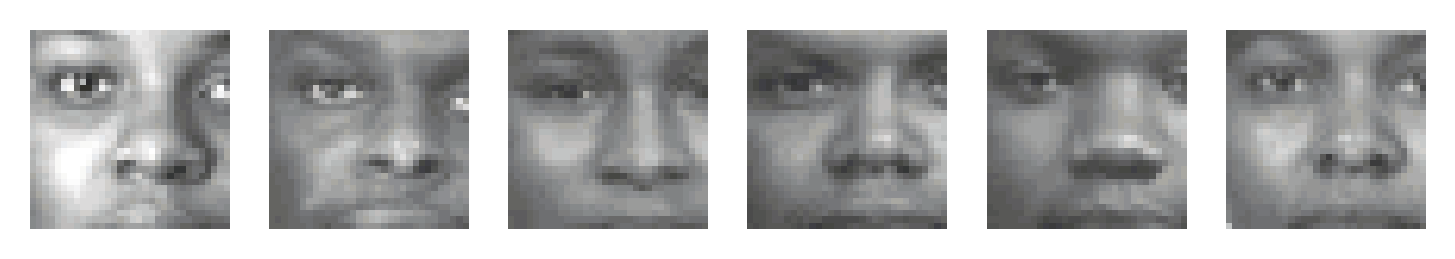

09/10 04:21:46 PM: Extracting embeddings for white


white


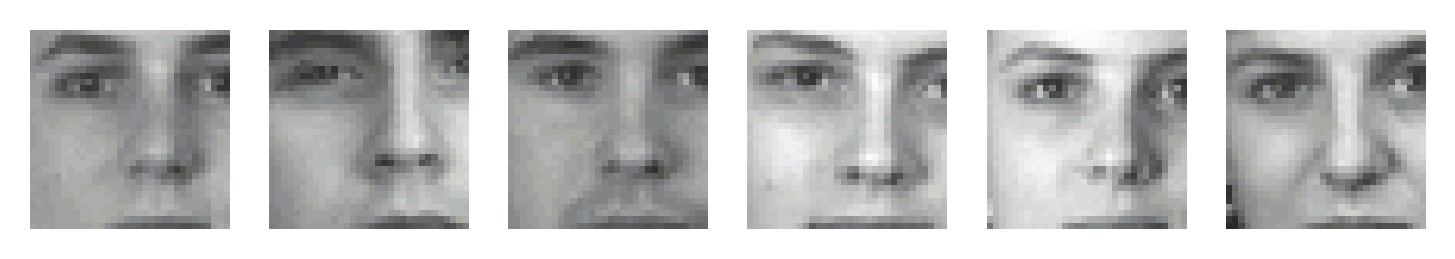

09/10 04:22:09 PM: Extracting embeddings for tool


tool


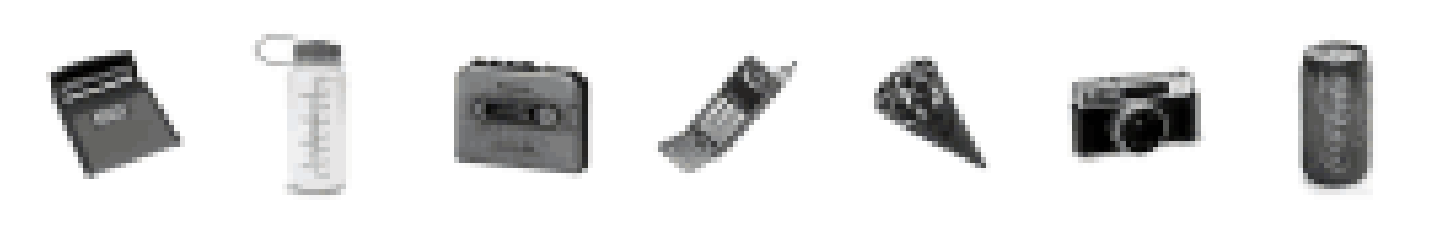

09/10 04:22:37 PM: Extracting embeddings for weapon


weapon


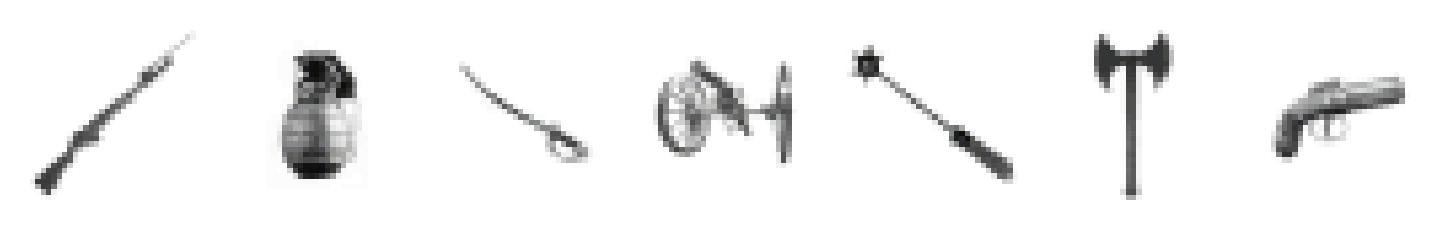

09/10 04:23:08 PM: Running test
09/10 04:23:08 PM: Computing cosine similarities...
09/10 04:23:08 PM: Null hypothesis: no difference between black and white in association to attributes tool and weapon
09/10 04:23:08 PM: Computing pval...
09/10 04:23:08 PM: Using non-parametric test
09/10 04:23:08 PM: Using exact test (924 partitions)
09/10 04:23:08 PM: Equalities contributed 1/924 to p-value
09/10 04:23:08 PM: pval: 0.00541126
09/10 04:23:08 PM: computing effect size...
09/10 04:23:08 PM: esize: 1.43693


(1.436934, 0.005411255411255411)

In [6]:
from ieat.api import test

test(
    "data/experiments/weapon/black",
    "data/experiments/weapon/white",
    "data/experiments/weapon/tool",
    "data/experiments/weapon/weapon",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px
#     from_cache=False
)

#### Native

09/10 04:23:08 PM: Extracting embeddings for euro


euro


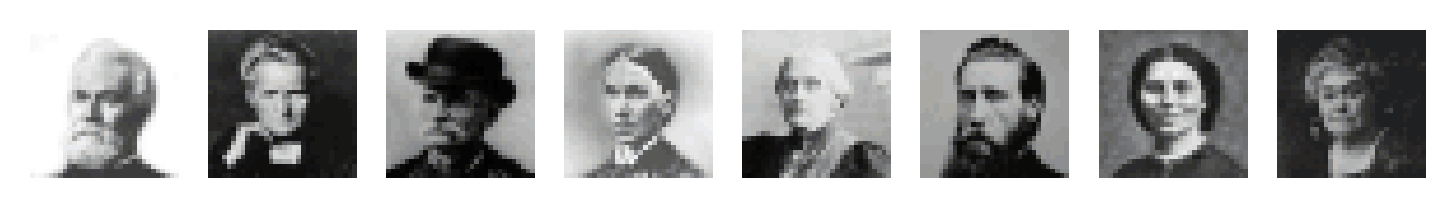

09/10 04:23:45 PM: Extracting embeddings for native


native


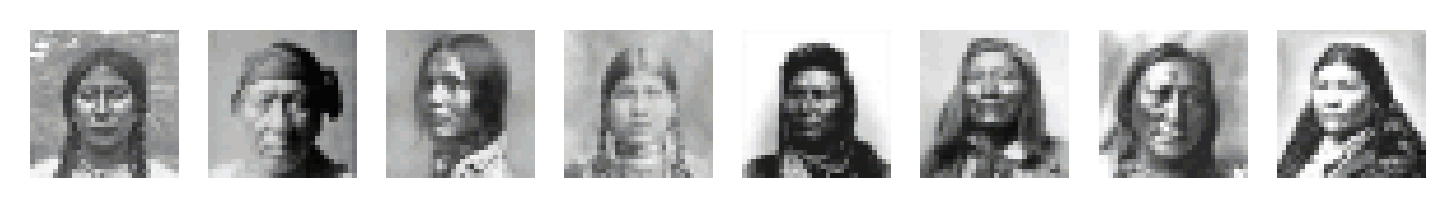

09/10 04:24:19 PM: Extracting embeddings for us


us


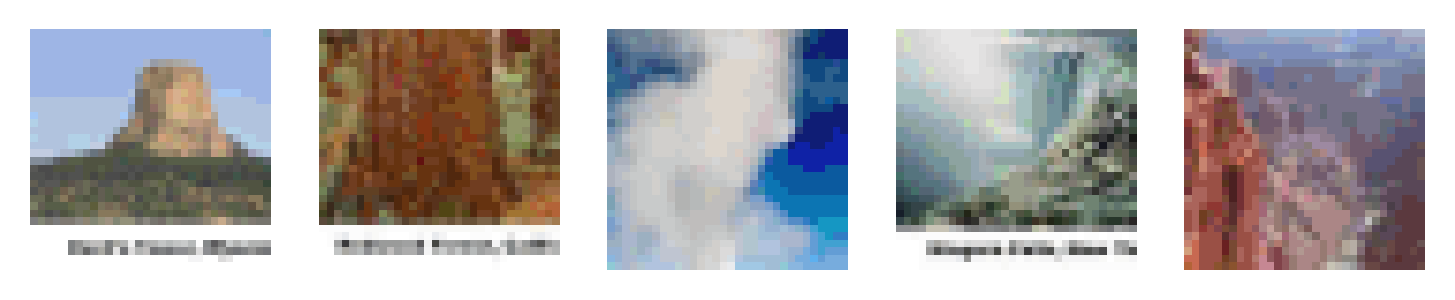

09/10 04:24:39 PM: Extracting embeddings for world


world


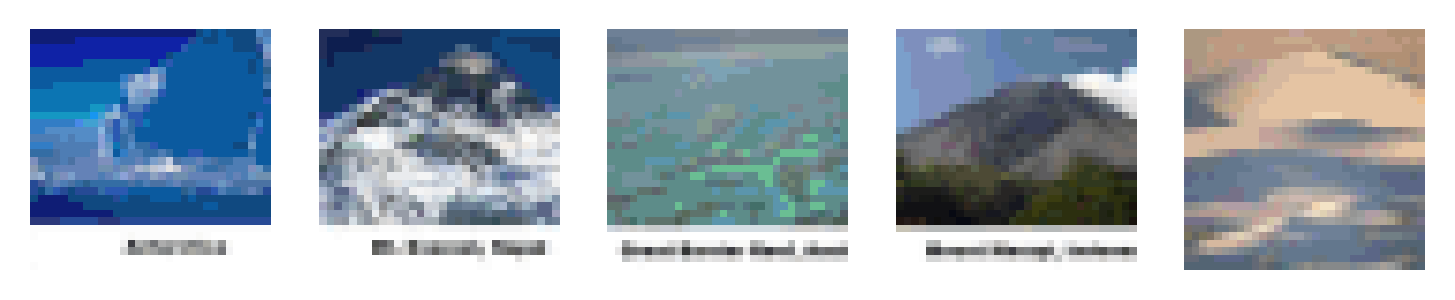

09/10 04:25:00 PM: Running test
09/10 04:25:00 PM: Computing cosine similarities...
09/10 04:25:00 PM: Null hypothesis: no difference between euro and native in association to attributes us and world
09/10 04:25:00 PM: Computing pval...
09/10 04:25:00 PM: Using non-parametric test
09/10 04:25:00 PM: Drawing 9999 samples (and biasing by 1)
09/10 04:25:00 PM: Equalities contributed 1/10000 to p-value
09/10 04:25:00 PM: pval: 0.7343
09/10 04:25:00 PM: computing effect size...
09/10 04:25:00 PM: esize: -0.315275


(-0.3152746, 0.7343)

In [7]:
test(
    "data/experiments/native/euro",
    "data/experiments/native/native",
    "data/experiments/native/us",
    "data/experiments/native/world",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px
#     from_cache=False
)

#### Asian

[autoreload of ieat.api failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_wi

european-american


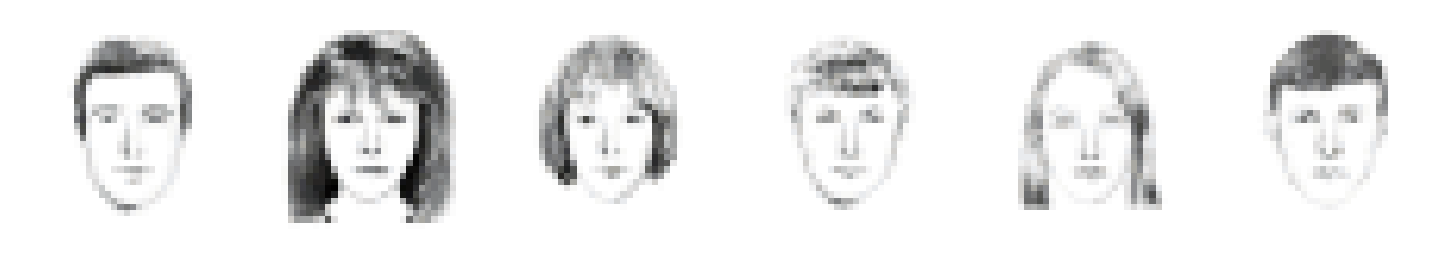

09/10 04:48:32 PM: Extracting embeddings for asian-american


asian-american


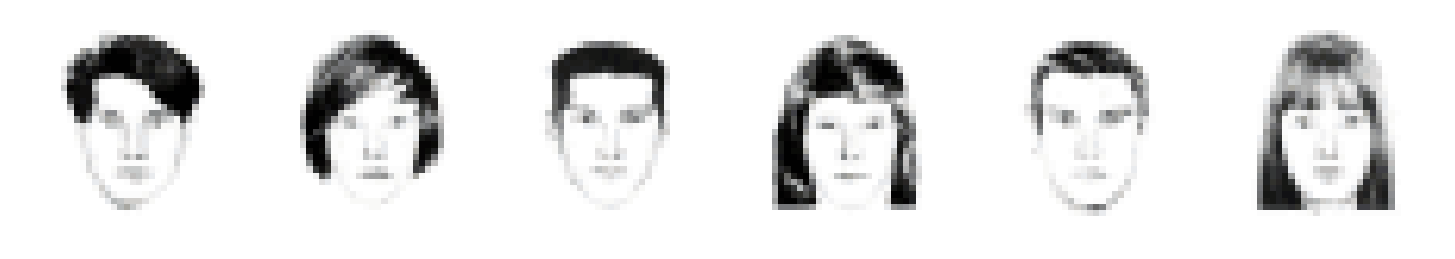

09/10 04:49:37 PM: Extracting embeddings for american


american


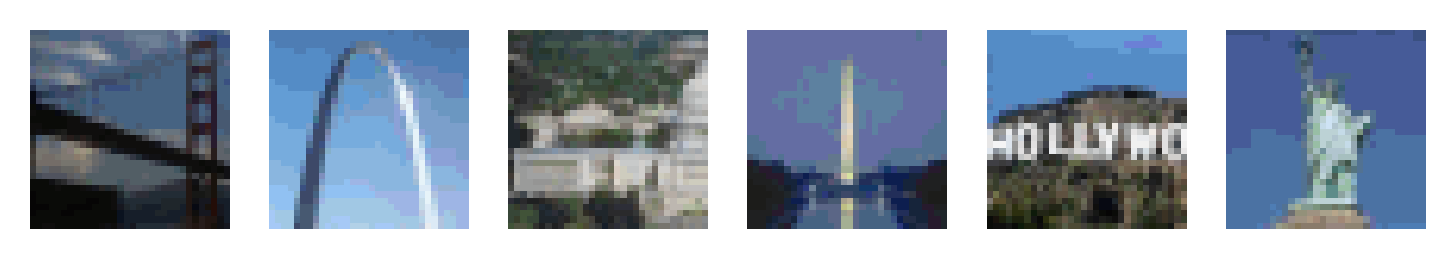

09/10 04:50:26 PM: Extracting embeddings for foreign


foreign


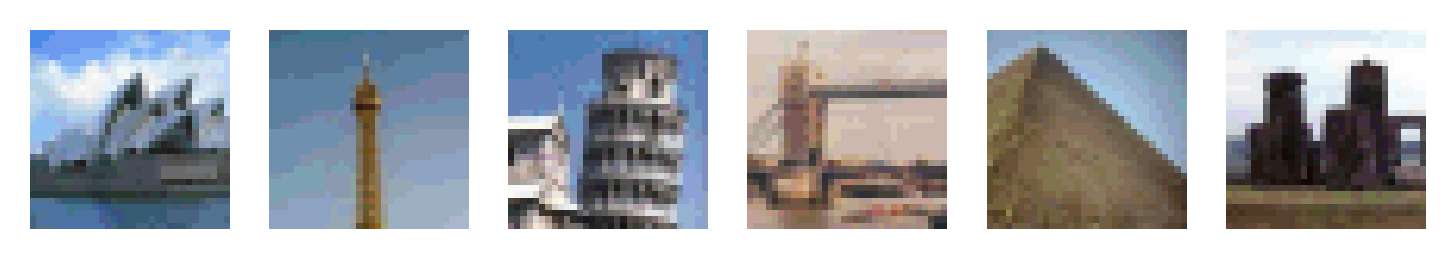

09/10 04:51:18 PM: Running test
09/10 04:51:18 PM: Computing cosine similarities...
09/10 04:51:18 PM: Null hypothesis: no difference between european-american and asian-american in association to attributes american and foreign
09/10 04:51:18 PM: Computing pval...
09/10 04:51:18 PM: Using non-parametric test
09/10 04:51:18 PM: Using exact test (924 partitions)
09/10 04:51:18 PM: Equalities contributed 1/924 to p-value
09/10 04:51:18 PM: pval: 0.661255
09/10 04:51:18 PM: computing effect size...
09/10 04:51:18 PM: esize: -0.258288


(-0.25828832, 0.6612554112554112)

In [23]:
test(
    "data/experiments/asian/european-american",
    "data/experiments/asian/asian-american",
    "data/experiments/asian/american",
    "data/experiments/asian/foreign",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px
#     from_cache=False
)

#### Insect-Flower

09/10 04:25:00 PM: Loading embeddings for flower from file


flower


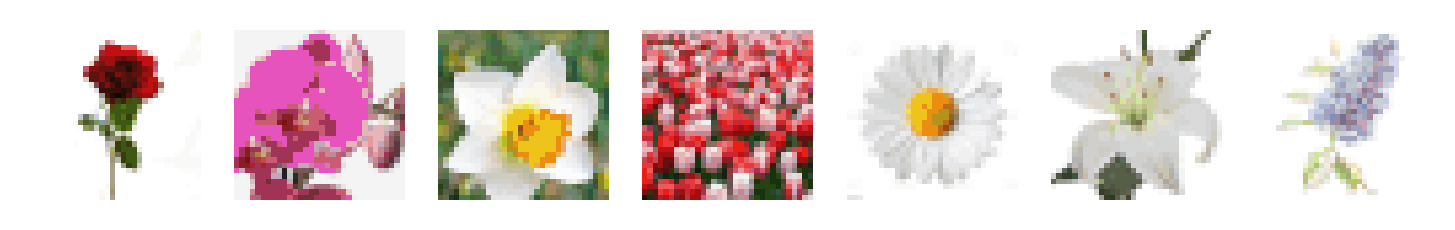

09/10 04:25:01 PM: Loading embeddings for insect from file


insect


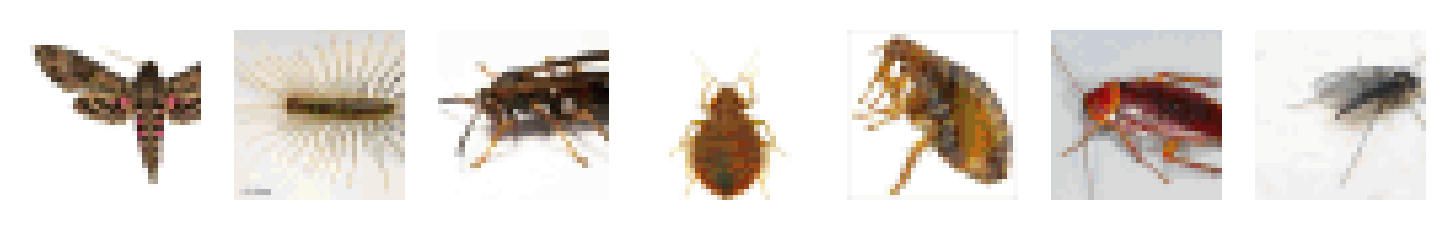

09/10 04:25:01 PM: Loading embeddings for pleasant from file


pleasant


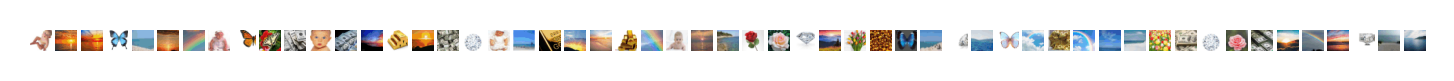

09/10 04:25:05 PM: Loading embeddings for unpleasant from file


unpleasant


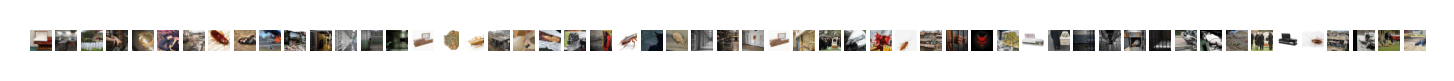

09/10 04:25:09 PM: Running test
09/10 04:25:09 PM: Computing cosine similarities...
09/10 04:25:09 PM: Null hypothesis: no difference between flower and insect in association to attributes pleasant and unpleasant
09/10 04:25:09 PM: Computing pval...
09/10 04:25:09 PM: Using non-parametric test
09/10 04:25:09 PM: Using exact test (3432 partitions)
09/10 04:25:09 PM: Equalities contributed 1/3432 to p-value
09/10 04:25:09 PM: pval: 0.0891608
09/10 04:25:09 PM: computing effect size...
09/10 04:25:09 PM: esize: 0.735025


(0.7350253085418139, 0.08916083916083917)

In [8]:
from ieat.api import test

test(
    "data/experiments/insect-flower/flower",
    "data/experiments/insect-flower/insect",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Weight

[autoreload of ieat.api failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/steed/caliskan/git/image-gpt-bias/ieat/api.py", line 15, in <module>
    model_type,
NameError: name 'model_type' i

thin


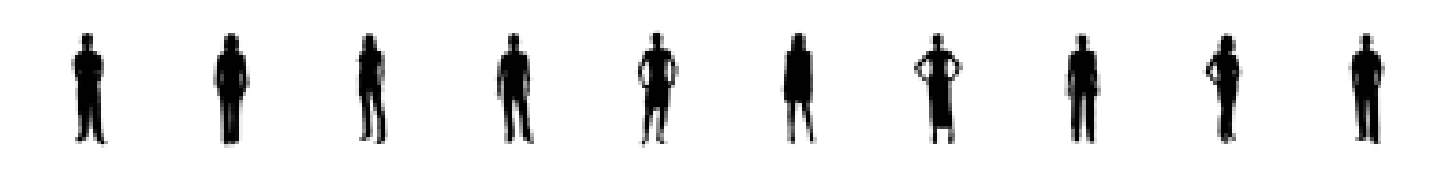

09/10 04:51:20 PM: Loading embeddings for fat from file


fat


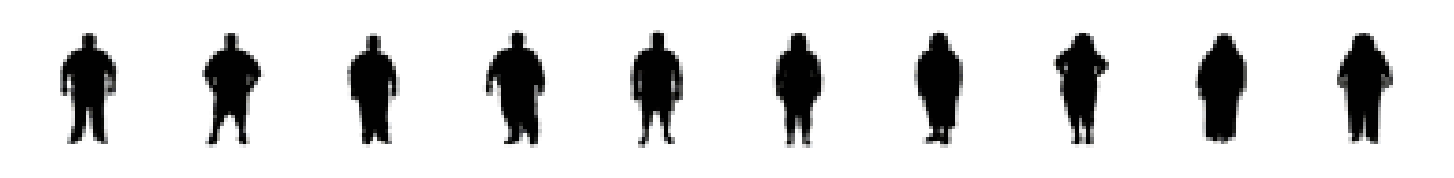

09/10 04:51:23 PM: Loading embeddings for pleasant from file


pleasant


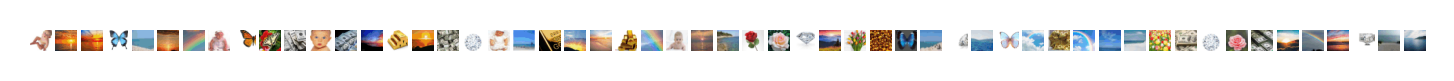

09/10 04:51:33 PM: Loading embeddings for unpleasant from file


unpleasant


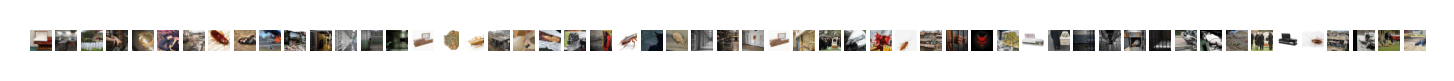

09/10 04:51:40 PM: Running test
09/10 04:51:40 PM: Computing cosine similarities...
09/10 04:51:40 PM: Null hypothesis: no difference between thin and fat in association to attributes pleasant and unpleasant
09/10 04:51:40 PM: Computing pval...
09/10 04:51:40 PM: Using non-parametric test
09/10 04:51:40 PM: Drawing 9999 samples (and biasing by 1)
09/10 04:51:40 PM: pval: 0.0001
09/10 04:51:40 PM: computing effect size...
09/10 04:51:40 PM: esize: 1.7417


(1.7416995163458509, 0.0001)

In [24]:
from ieat.api import test

test(
    "data/experiments/weight/thin",
    "data/experiments/weight/fat",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Skin-Tone

09/10 04:26:40 PM: Extracting embeddings for light


light


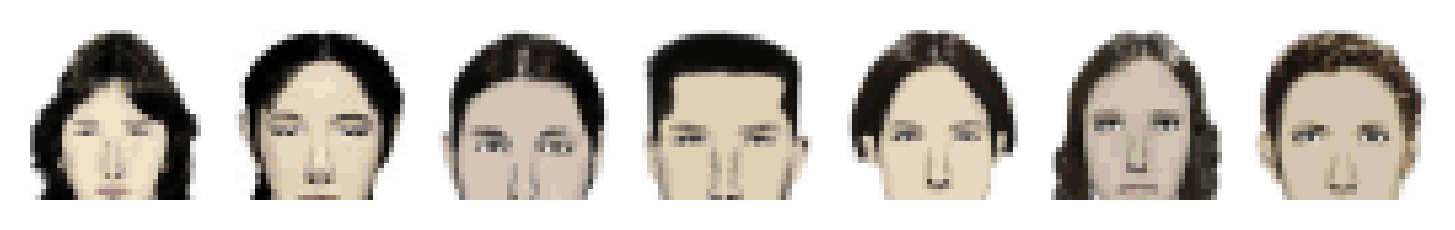

09/10 04:27:12 PM: Extracting embeddings for dark


dark


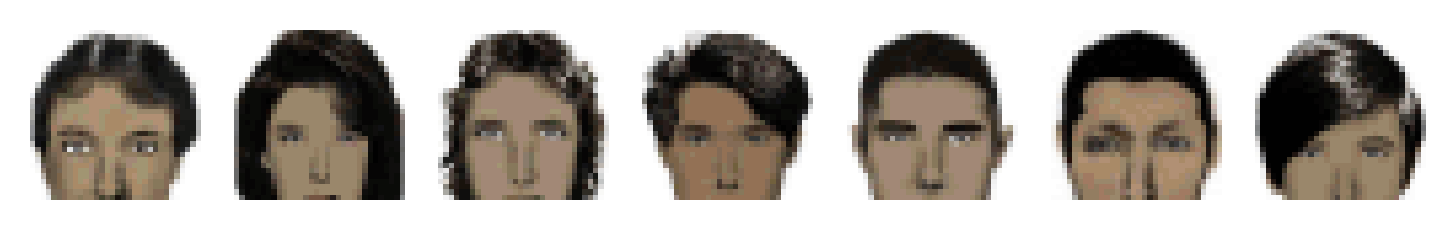

09/10 04:27:40 PM: Loading embeddings for pleasant from file


pleasant


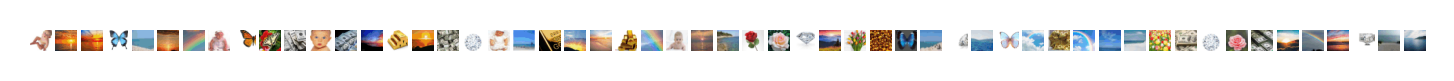

09/10 04:27:43 PM: Loading embeddings for unpleasant from file


unpleasant


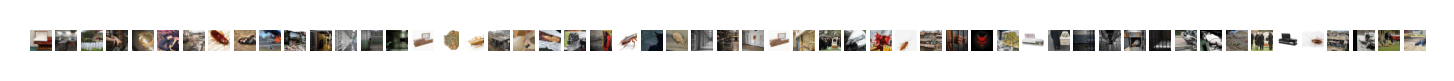

09/10 04:27:46 PM: Running test
09/10 04:27:46 PM: Computing cosine similarities...
09/10 04:27:46 PM: Null hypothesis: no difference between light and dark in association to attributes pleasant and unpleasant
09/10 04:27:46 PM: Computing pval...
09/10 04:27:46 PM: Using non-parametric test
09/10 04:27:46 PM: Using exact test (3432 partitions)
09/10 04:27:46 PM: Equalities contributed 1/3432 to p-value
09/10 04:27:46 PM: pval: 0.000874126
09/10 04:27:46 PM: computing effect size...
09/10 04:27:46 PM: esize: 1.59554


(1.5955380466388793, 0.0008741258741258741)

In [10]:
from ieat.api import test

test(
    "data/experiments/skin-tone/light",
    "data/experiments/skin-tone/dark",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Disability

[autoreload of ieat.api failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/steed/caliskan/git/image-gpt-bias/ieat/api.py", line 15, in <module>
    model_type,
NameError: name 'model_type' i

disabled


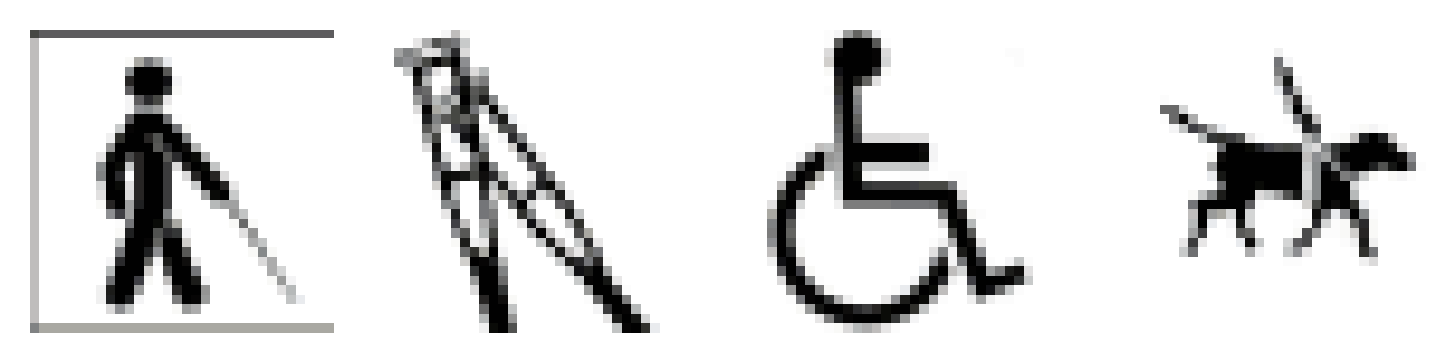

09/10 04:51:41 PM: Loading embeddings for abled from file


abled


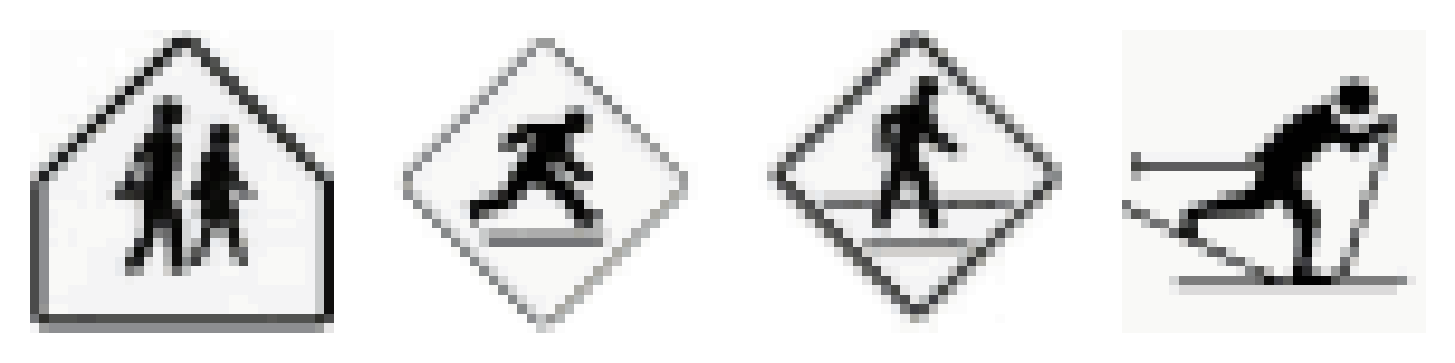

09/10 04:51:41 PM: Loading embeddings for pleasant from file


pleasant


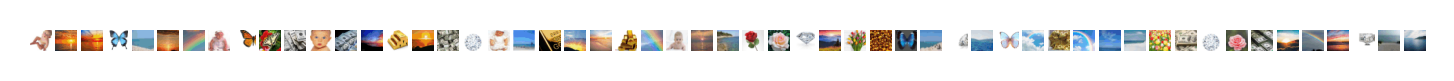

09/10 04:51:47 PM: Loading embeddings for unpleasant from file


unpleasant


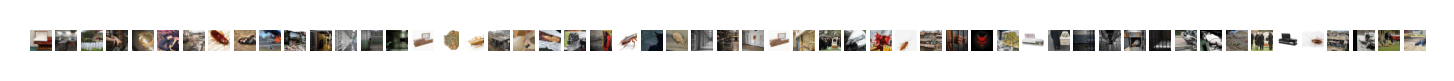

09/10 04:51:51 PM: Running test
09/10 04:51:51 PM: Computing cosine similarities...
09/10 04:51:51 PM: Null hypothesis: no difference between disabled and abled in association to attributes pleasant and unpleasant
09/10 04:51:51 PM: Computing pval...
09/10 04:51:51 PM: Using non-parametric test
09/10 04:51:51 PM: Using exact test (70 partitions)
09/10 04:51:51 PM: Equalities contributed 1/70 to p-value
09/10 04:51:51 PM: pval: 0.0142857
09/10 04:51:52 PM: computing effect size...
09/10 04:51:52 PM: esize: 1.41369


(1.413685339688973, 0.014285714285714285)

In [25]:
from ieat.api import test

test(
    "data/experiments/disabled/disabled",
    "data/experiments/disabled/abled",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Presidents

09/10 04:28:25 PM: Extracting embeddings for trump


trump


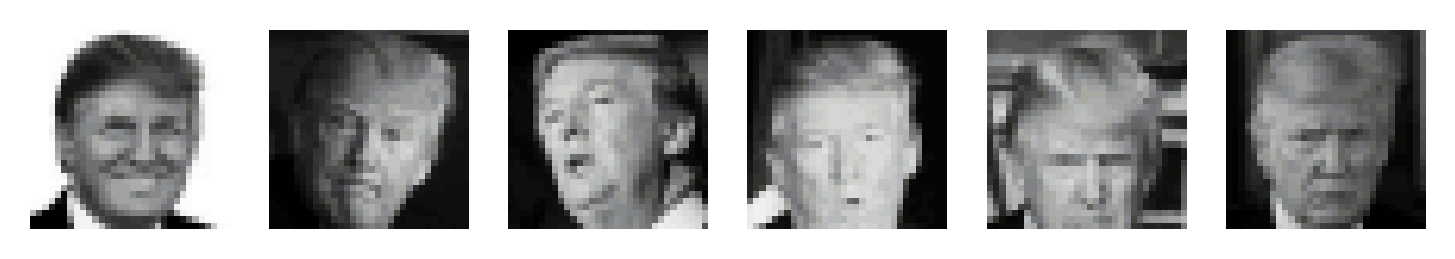

09/10 04:28:53 PM: Extracting embeddings for kennedy


kennedy


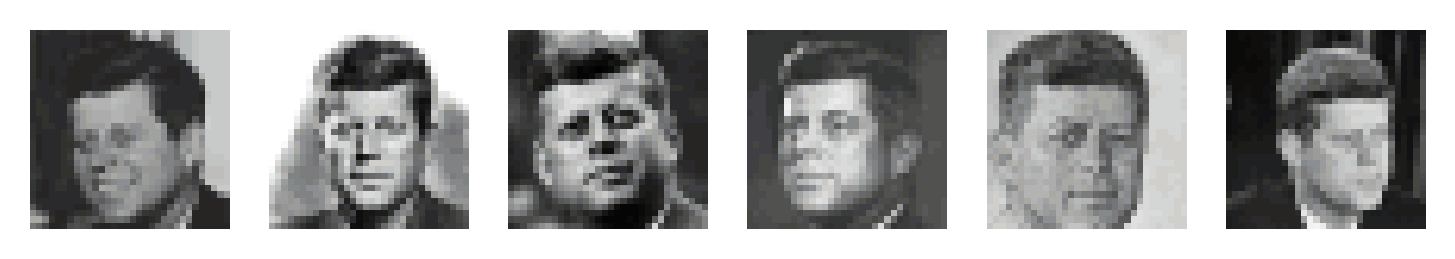

09/10 04:29:16 PM: Loading embeddings for pleasant from file


pleasant


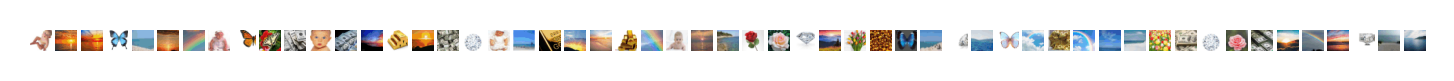

09/10 04:29:20 PM: Loading embeddings for unpleasant from file


unpleasant


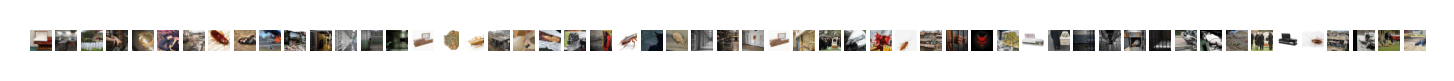

09/10 04:29:23 PM: Running test
09/10 04:29:23 PM: Computing cosine similarities...
09/10 04:29:23 PM: Null hypothesis: no difference between trump and kennedy in association to attributes pleasant and unpleasant
09/10 04:29:23 PM: Computing pval...
09/10 04:29:23 PM: Using non-parametric test
09/10 04:29:23 PM: Using exact test (924 partitions)
09/10 04:29:23 PM: Equalities contributed 1/924 to p-value
09/10 04:29:23 PM: pval: 0.574675
09/10 04:29:23 PM: computing effect size...
09/10 04:29:23 PM: esize: -0.122669


(-0.12266920005032395, 0.5746753246753247)

In [12]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/kennedy",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

09/10 04:29:24 PM: Loading embeddings for trump from file


trump


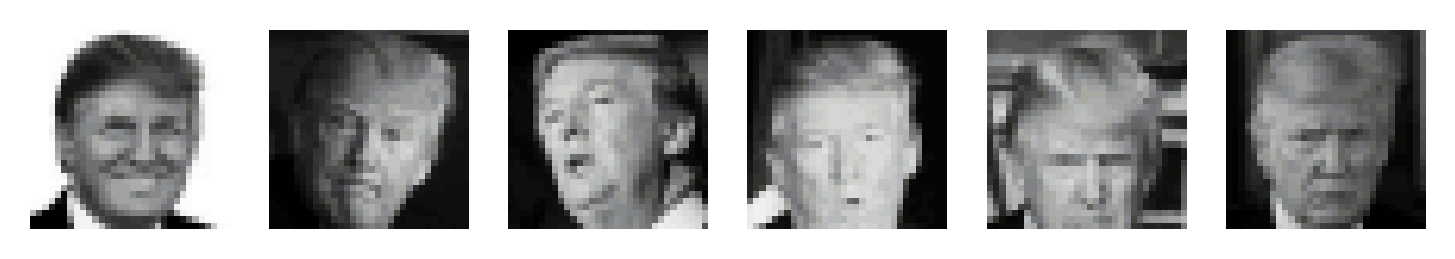

09/10 04:29:24 PM: Extracting embeddings for clinton


clinton


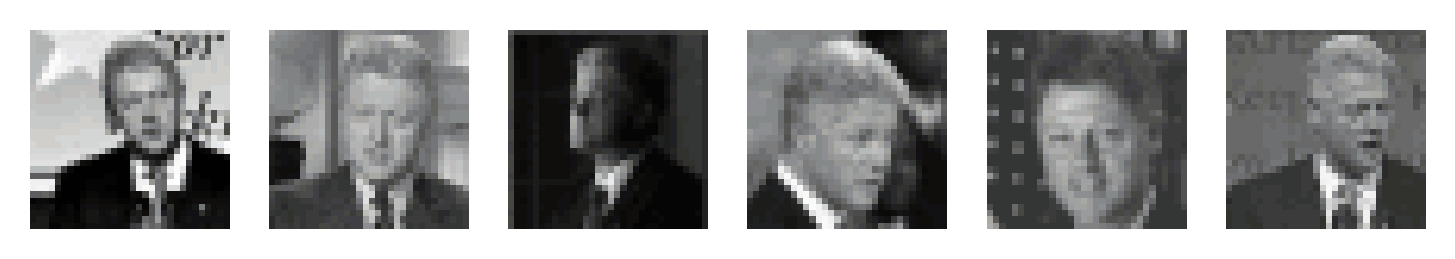

09/10 04:29:50 PM: Loading embeddings for pleasant from file


pleasant


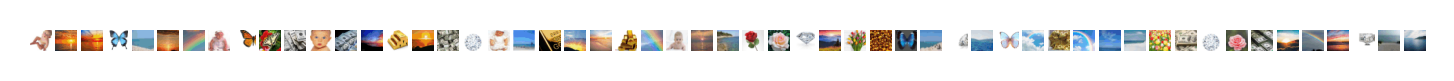

09/10 04:29:54 PM: Loading embeddings for unpleasant from file


unpleasant


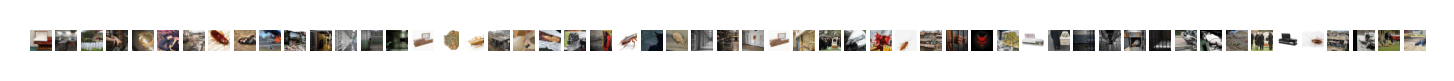

09/10 04:29:57 PM: Running test
09/10 04:29:57 PM: Computing cosine similarities...
09/10 04:29:57 PM: Null hypothesis: no difference between trump and clinton in association to attributes pleasant and unpleasant
09/10 04:29:57 PM: Computing pval...
09/10 04:29:57 PM: Using non-parametric test
09/10 04:29:57 PM: Using exact test (924 partitions)
09/10 04:29:57 PM: Equalities contributed 1/924 to p-value
09/10 04:29:57 PM: pval: 0.461039
09/10 04:29:57 PM: computing effect size...
09/10 04:29:57 PM: esize: 0.0838529


(0.08385292810872585, 0.461038961038961)

In [13]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/clinton",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

09/10 04:29:58 PM: Loading embeddings for trump from file


trump


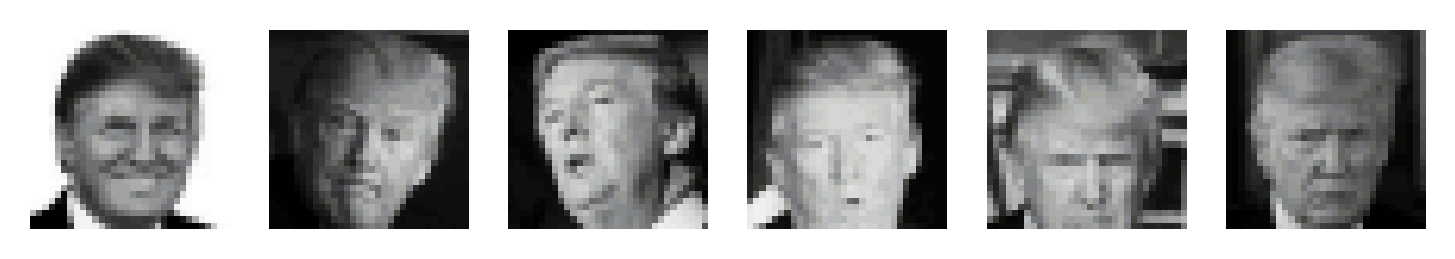

09/10 04:29:58 PM: Extracting embeddings for bush


bush


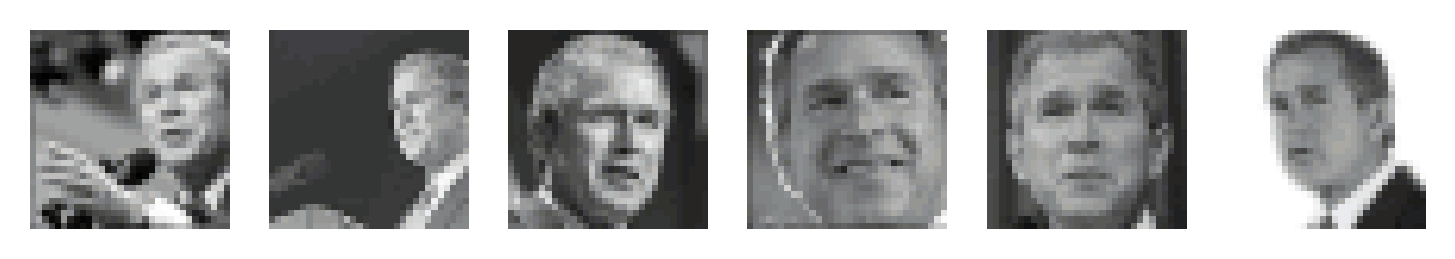

09/10 04:30:28 PM: Loading embeddings for pleasant from file


pleasant


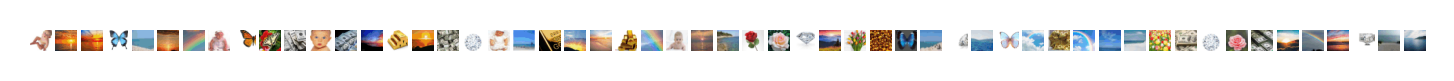

09/10 04:30:32 PM: Loading embeddings for unpleasant from file


unpleasant


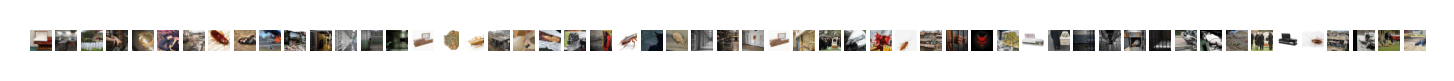

09/10 04:30:36 PM: Running test
09/10 04:30:36 PM: Computing cosine similarities...
09/10 04:30:36 PM: Null hypothesis: no difference between trump and bush in association to attributes pleasant and unpleasant
09/10 04:30:36 PM: Computing pval...
09/10 04:30:36 PM: Using non-parametric test
09/10 04:30:36 PM: Using exact test (924 partitions)
09/10 04:30:36 PM: Equalities contributed 1/924 to p-value
09/10 04:30:36 PM: pval: 0.781385
09/10 04:30:36 PM: computing effect size...
09/10 04:30:36 PM: esize: -0.476651


(-0.47665113696561606, 0.7813852813852814)

In [14]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/bush",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

09/10 04:30:36 PM: Loading embeddings for trump from file


trump


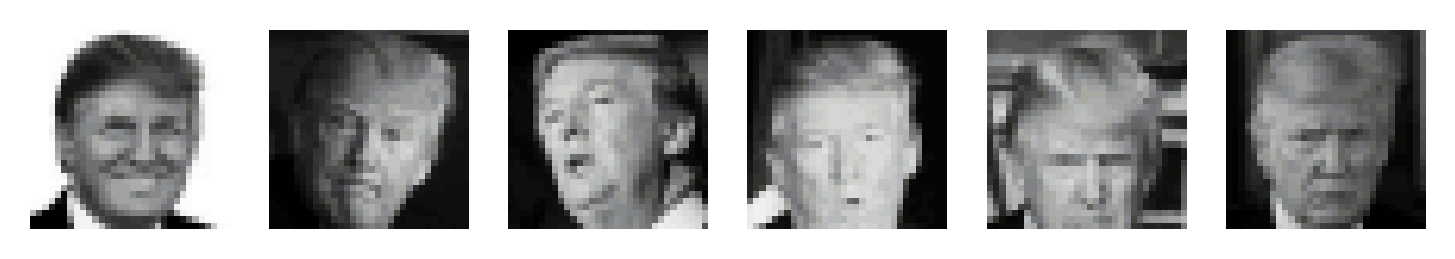

09/10 04:30:36 PM: Extracting embeddings for lincoln


lincoln


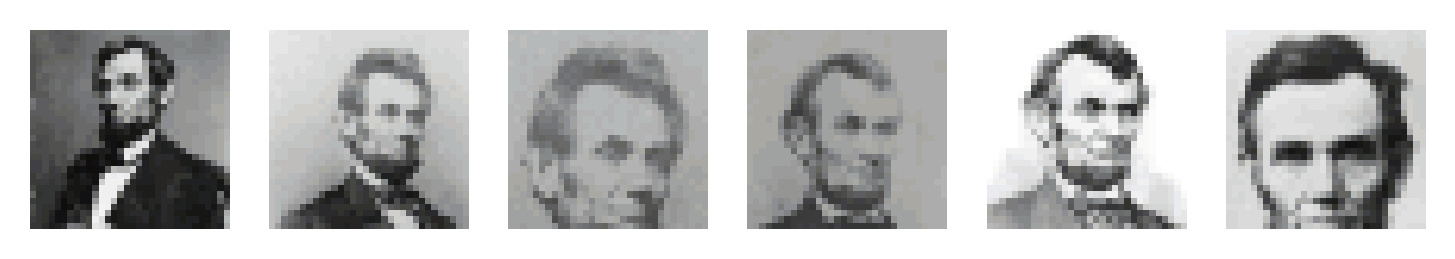

09/10 04:31:05 PM: Loading embeddings for pleasant from file


pleasant


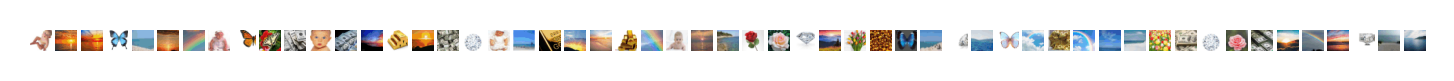

09/10 04:31:10 PM: Loading embeddings for unpleasant from file


unpleasant


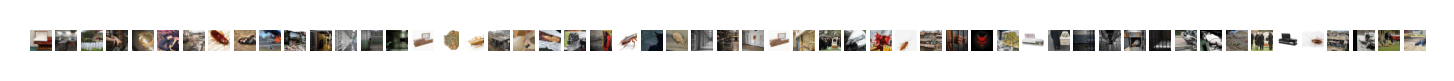

09/10 04:31:13 PM: Running test
09/10 04:31:13 PM: Computing cosine similarities...
09/10 04:31:13 PM: Null hypothesis: no difference between trump and lincoln in association to attributes pleasant and unpleasant
09/10 04:31:13 PM: Computing pval...
09/10 04:31:13 PM: Using non-parametric test
09/10 04:31:13 PM: Using exact test (924 partitions)
09/10 04:31:13 PM: Equalities contributed 1/924 to p-value
09/10 04:31:13 PM: pval: 0.949134
09/10 04:31:13 PM: computing effect size...
09/10 04:31:13 PM: esize: -0.949989


(-0.9499885067672672, 0.9491341991341992)

In [15]:
from ieat.api import test

test(
    "data/experiments/presidents/trump",
    "data/experiments/presidents/lincoln",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Religion

09/10 04:31:14 PM: Extracting embeddings for christianity


christianity


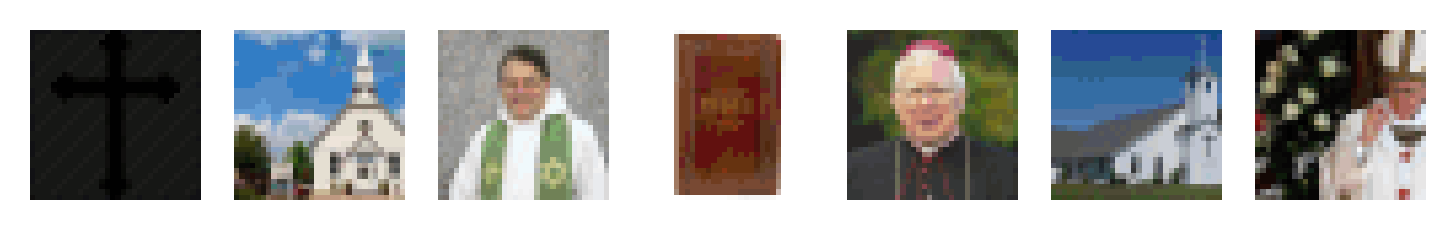

09/10 04:31:46 PM: Extracting embeddings for judaism


judaism


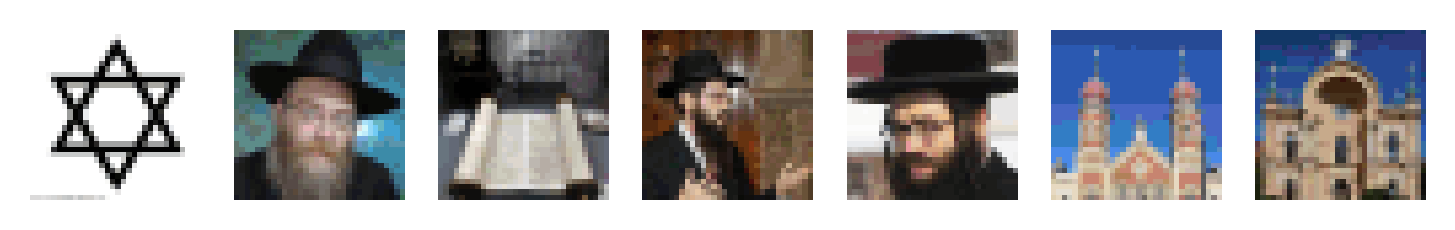

09/10 04:32:16 PM: Loading embeddings for pleasant from file


pleasant


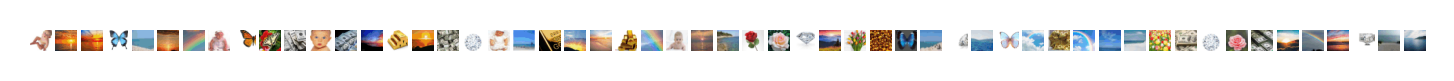

09/10 04:32:20 PM: Loading embeddings for unpleasant from file


unpleasant


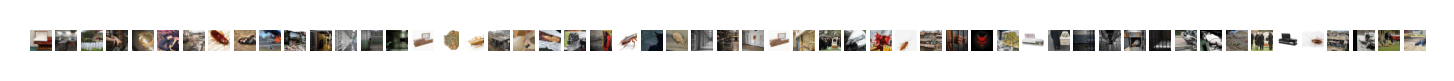

09/10 04:32:24 PM: Running test
09/10 04:32:24 PM: Computing cosine similarities...
09/10 04:32:24 PM: Null hypothesis: no difference between christianity and judaism in association to attributes pleasant and unpleasant
09/10 04:32:24 PM: Computing pval...
09/10 04:32:24 PM: Using non-parametric test
09/10 04:32:24 PM: Using exact test (3432 partitions)
09/10 04:32:24 PM: Equalities contributed 1/3432 to p-value
09/10 04:32:24 PM: pval: 0.288462
09/10 04:32:24 PM: computing effect size...
09/10 04:32:24 PM: esize: 0.305577


(0.3055768191029878, 0.28846153846153844)

In [16]:
from ieat.api import test

test(
    "data/experiments/religion/christianity",
    "data/experiments/religion/judaism",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Gender-Science

09/10 04:32:24 PM: Extracting embeddings for science


science


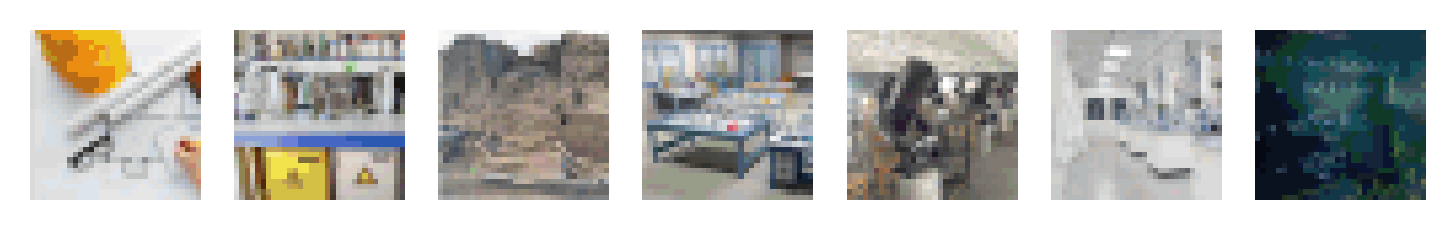

09/10 04:32:56 PM: Extracting embeddings for liberal-arts


liberal-arts


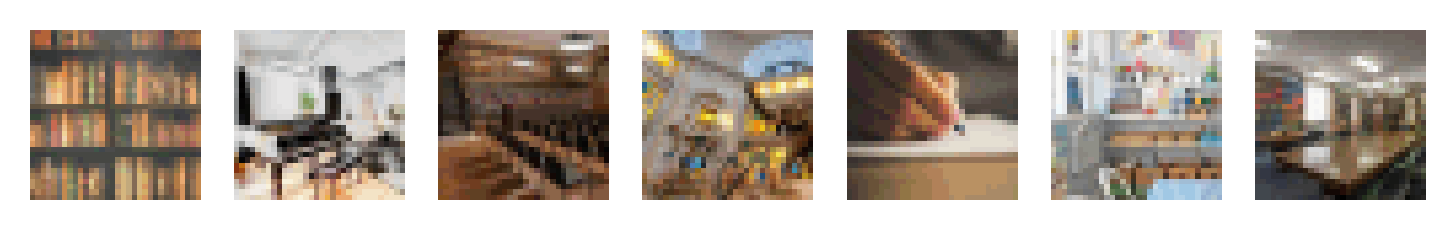

09/10 04:33:23 PM: Extracting embeddings for male


male


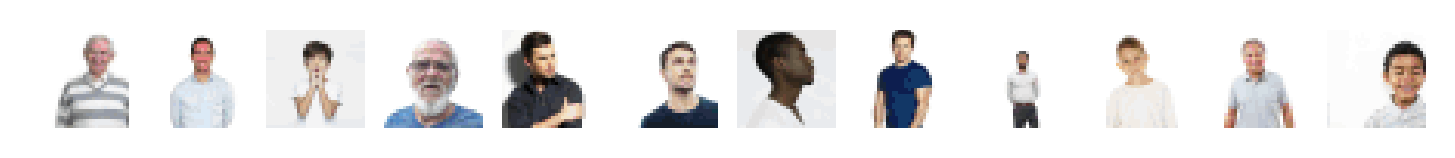

09/10 04:34:09 PM: Extracting embeddings for female


female


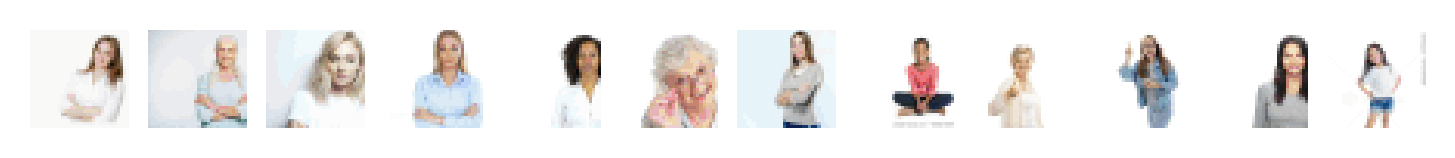

09/10 04:34:56 PM: Running test
09/10 04:34:56 PM: Computing cosine similarities...
09/10 04:34:56 PM: Null hypothesis: no difference between science and liberal-arts in association to attributes male and female
09/10 04:34:56 PM: Computing pval...
09/10 04:34:56 PM: Using non-parametric test
09/10 04:34:56 PM: Using exact test (3432 partitions)
09/10 04:34:56 PM: Equalities contributed 1/3432 to p-value
09/10 04:34:56 PM: pval: 0.734848
09/10 04:34:56 PM: computing effect size...
09/10 04:34:56 PM: esize: -0.347334


(-0.34733358, 0.7348484848484849)

In [17]:
from ieat.api import test

test(
    "data/experiments/gender/science",
    "data/experiments/gender/liberal-arts",
    "data/experiments/gender/male",
    "data/experiments/gender/female",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Gender-Career

09/10 04:34:56 PM: Extracting embeddings for career


career


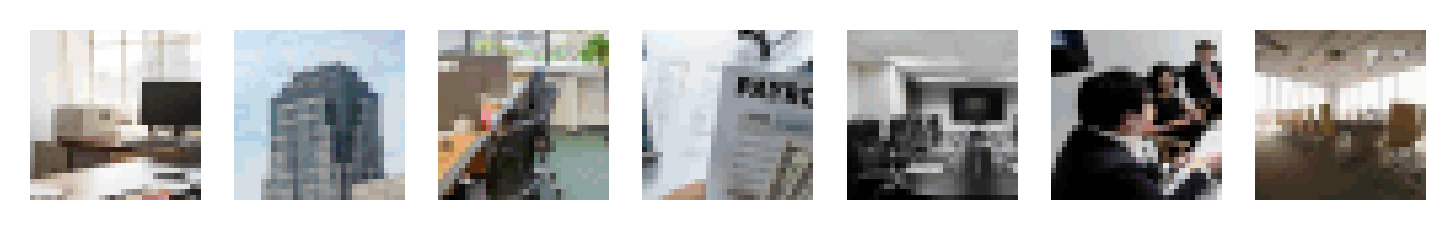

09/10 04:35:29 PM: Extracting embeddings for family


family


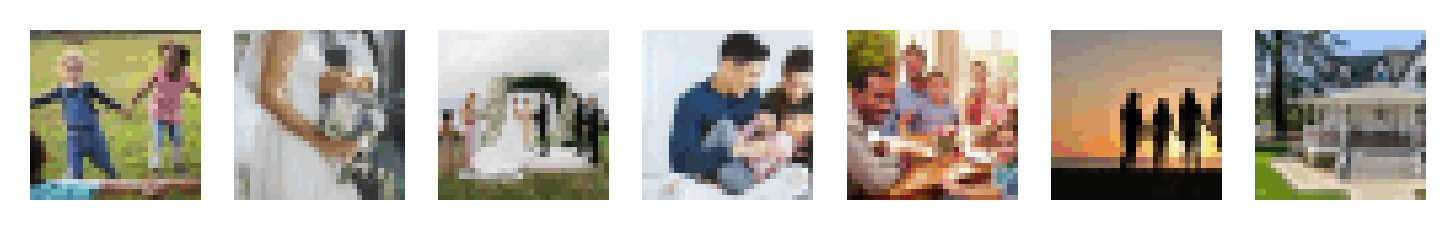

09/10 04:35:58 PM: Loading embeddings for male from file


male


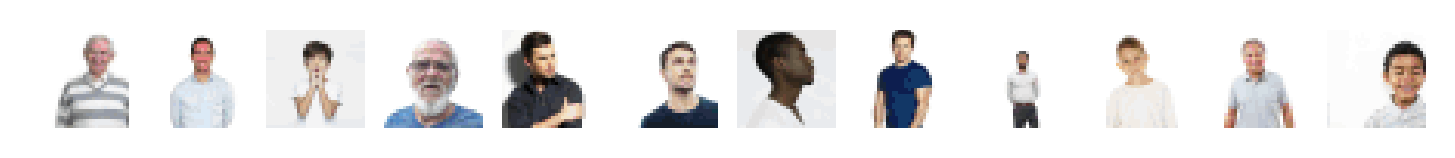

09/10 04:35:59 PM: Loading embeddings for female from file


female


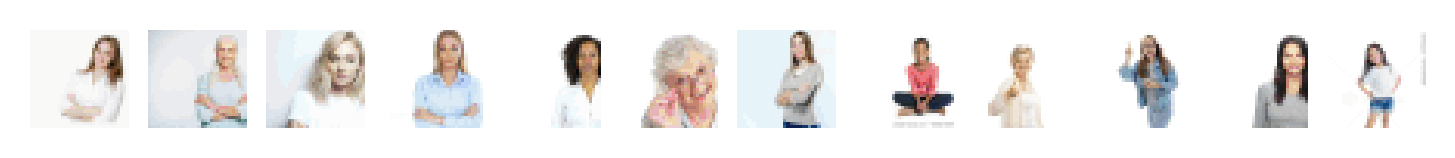

09/10 04:35:59 PM: Running test
09/10 04:35:59 PM: Computing cosine similarities...
09/10 04:35:59 PM: Null hypothesis: no difference between career and family in association to attributes male and female
09/10 04:35:59 PM: Computing pval...
09/10 04:35:59 PM: Using non-parametric test
09/10 04:35:59 PM: Using exact test (3432 partitions)
09/10 04:35:59 PM: Equalities contributed 1/3432 to p-value
09/10 04:35:59 PM: pval: 0.176282
09/10 04:35:59 PM: computing effect size...
09/10 04:35:59 PM: esize: 0.522119


(0.5221185998947563, 0.1762820512820513)

In [18]:
from ieat.api import test

test(
    "data/experiments/gender/career",
    "data/experiments/gender/family",
    "data/experiments/gender/male",
    "data/experiments/gender/female",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Sexuality

09/10 04:35:59 PM: Extracting embeddings for gay


gay


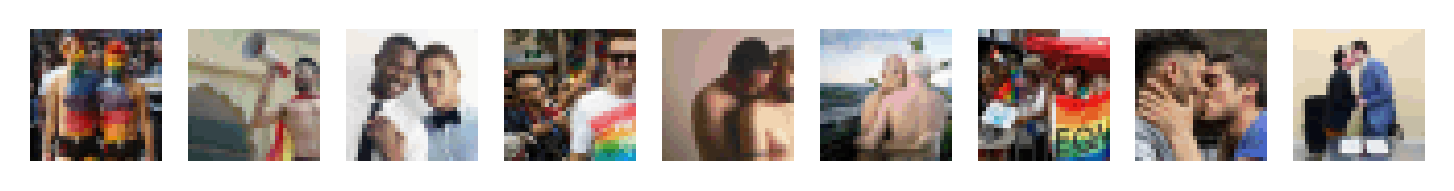

09/10 04:36:41 PM: Extracting embeddings for straight


straight


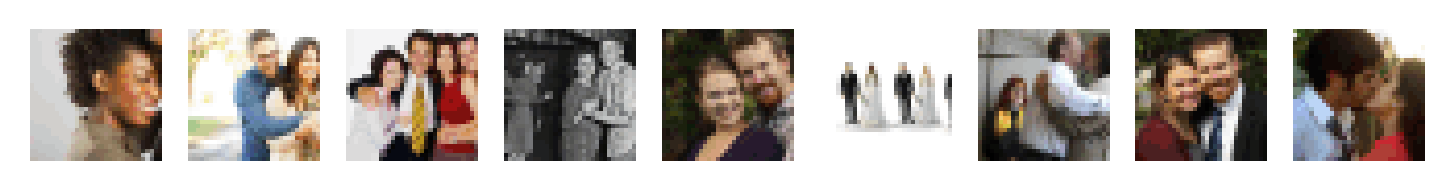

09/10 04:38:25 PM: Loading embeddings for pleasant from file


pleasant


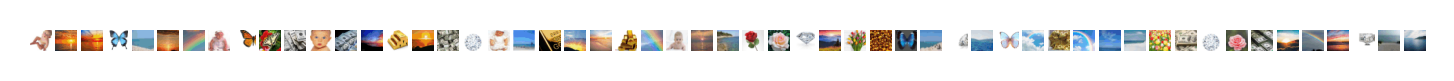

09/10 04:38:32 PM: Loading embeddings for unpleasant from file


unpleasant


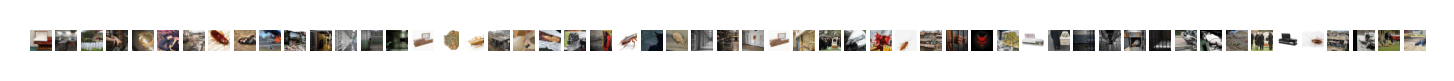

09/10 04:38:37 PM: Running test
09/10 04:38:37 PM: Computing cosine similarities...
09/10 04:38:37 PM: Null hypothesis: no difference between gay and straight in association to attributes pleasant and unpleasant
09/10 04:38:37 PM: Computing pval...
09/10 04:38:37 PM: Using non-parametric test
09/10 04:38:37 PM: Drawing 9999 samples (and biasing by 1)
09/10 04:38:38 PM: pval: 0.3772
09/10 04:38:38 PM: computing effect size...
09/10 04:38:38 PM: esize: 0.15478


(0.1547801081672766, 0.3772)

In [19]:
from ieat.api import test

test(
    "data/experiments/sexuality/gay",
    "data/experiments/sexuality/straight",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Race

09/10 04:38:38 PM: Extracting embeddings for african-american


african-american


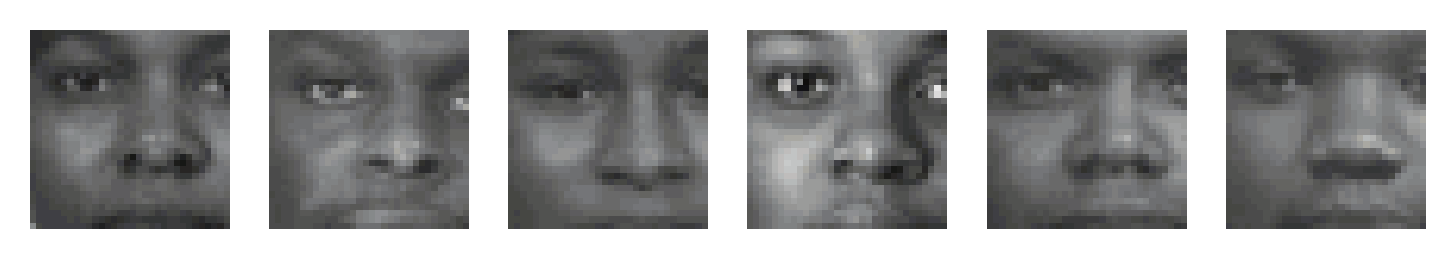

09/10 04:39:17 PM: Extracting embeddings for european-american


european-american


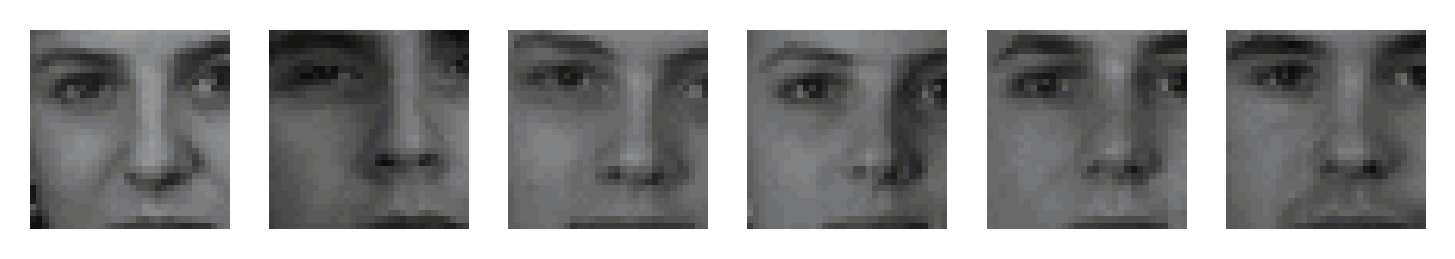

09/10 04:40:16 PM: Loading embeddings for pleasant from file


pleasant


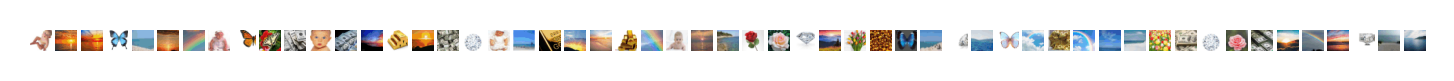

09/10 04:40:21 PM: Loading embeddings for unpleasant from file


unpleasant


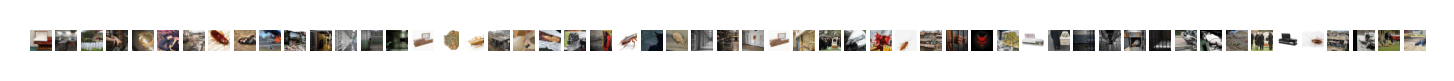

09/10 04:40:25 PM: Running test
09/10 04:40:25 PM: Computing cosine similarities...
09/10 04:40:25 PM: Null hypothesis: no difference between african-american and european-american in association to attributes pleasant and unpleasant
09/10 04:40:25 PM: Computing pval...
09/10 04:40:25 PM: Using non-parametric test
09/10 04:40:25 PM: Using exact test (924 partitions)
09/10 04:40:25 PM: Equalities contributed 1/924 to p-value
09/10 04:40:25 PM: pval: 0.967532
09/10 04:40:25 PM: computing effect size...
09/10 04:40:25 PM: esize: -1.0724


(-1.0723956712882465, 0.9675324675324676)

In [20]:
from ieat.api import test

test(
    "data/experiments/race/african-american",
    "data/experiments/race/european-american",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Arab-Muslim

09/10 04:40:25 PM: Extracting embeddings for other-people


other-people


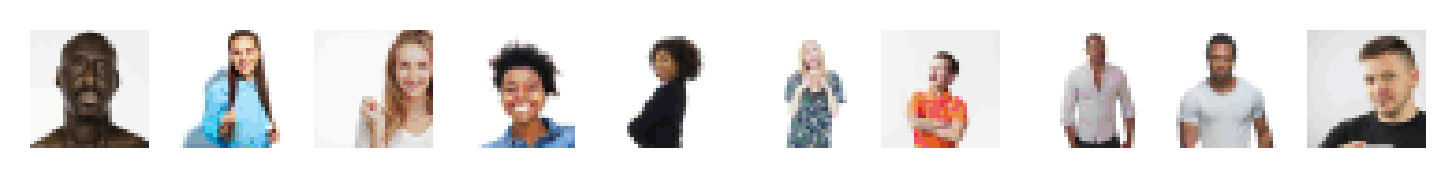

09/10 04:41:46 PM: Extracting embeddings for arab-muslim


arab-muslim


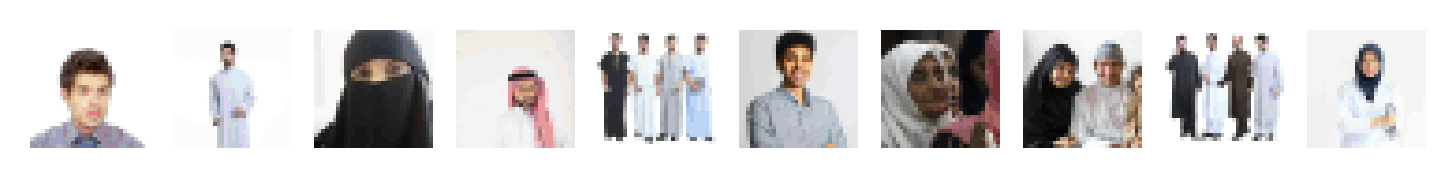

09/10 04:43:38 PM: Loading embeddings for pleasant from file


pleasant


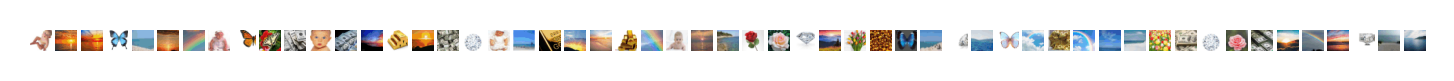

09/10 04:43:55 PM: Loading embeddings for unpleasant from file


unpleasant


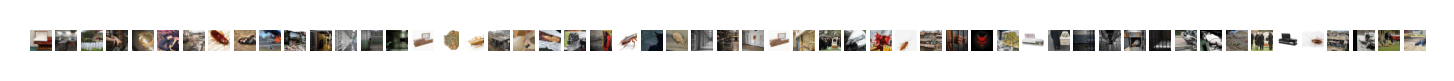

09/10 04:44:07 PM: Running test
09/10 04:44:07 PM: Computing cosine similarities...
09/10 04:44:07 PM: Null hypothesis: no difference between other-people and arab-muslim in association to attributes pleasant and unpleasant
09/10 04:44:07 PM: Computing pval...
09/10 04:44:07 PM: Using non-parametric test
09/10 04:44:07 PM: Drawing 9999 samples (and biasing by 1)
09/10 04:44:07 PM: pval: 0.05
09/10 04:44:07 PM: computing effect size...
09/10 04:44:07 PM: esize: 0.737081


(0.7370806107326997, 0.05)

In [21]:
from ieat.api import test

test(
    "data/experiments/arab-muslim/other-people",
    "data/experiments/arab-muslim/arab-muslim",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

#### Age

[autoreload of ieat.api failed: Traceback (most recent call last):
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_wi

young


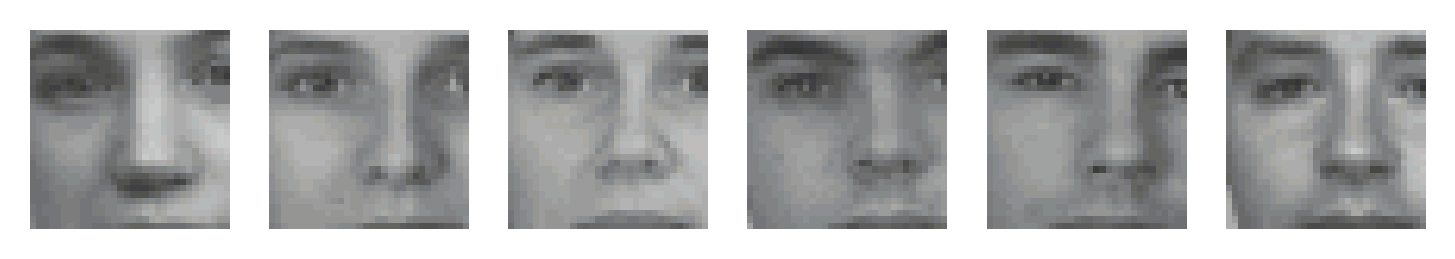

09/10 04:45:33 PM: Extracting embeddings for old


old


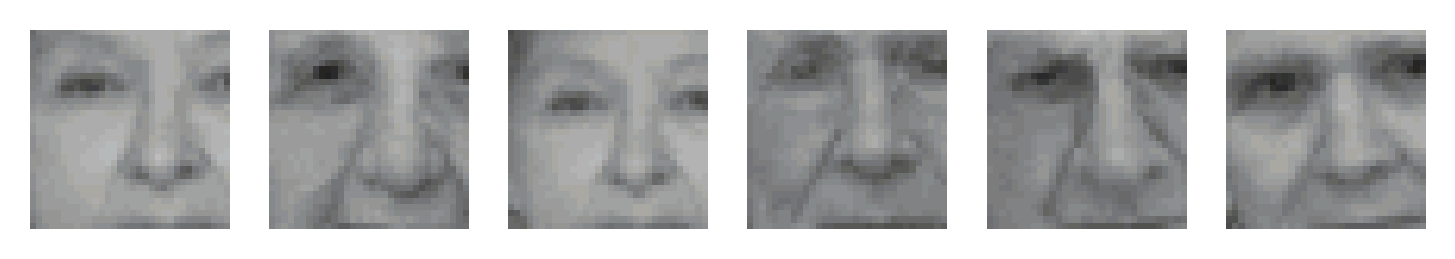

09/10 04:46:57 PM: Loading embeddings for pleasant from file


pleasant


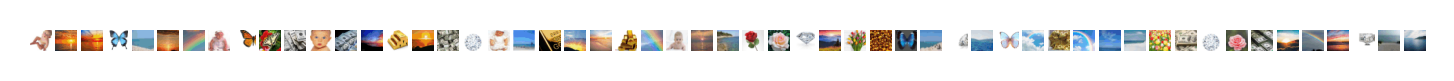

09/10 04:47:05 PM: Loading embeddings for unpleasant from file


unpleasant


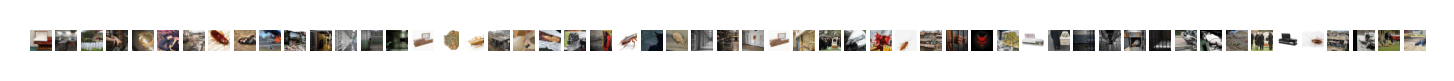

09/10 04:47:13 PM: Running test
09/10 04:47:13 PM: Computing cosine similarities...
09/10 04:47:13 PM: Null hypothesis: no difference between young and old in association to attributes pleasant and unpleasant
09/10 04:47:13 PM: Computing pval...
09/10 04:47:13 PM: Using non-parametric test
09/10 04:47:13 PM: Using exact test (924 partitions)
09/10 04:47:13 PM: Equalities contributed 1/924 to p-value
09/10 04:47:13 PM: pval: 0.497835
09/10 04:47:13 PM: computing effect size...
09/10 04:47:13 PM: esize: 0.00655377


(0.006553766936250568, 0.49783549783549785)

In [22]:
from ieat.api import test

test(
    "data/experiments/age/young",
    "data/experiments/age/old",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    model_type="openai", 
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
#     from_cache=False,
    verbose=True
)

### Download Cached Embeddings

In [ ]:
# to download from colab
from google.colab import files

!zip -r embeddings_colab.zip embeddings
files.download("embeddings_colab.zip")